In [2]:
#dataset: https://data.gov.sg/dataset/resale-flat-prices (hdb resale)
#dataset: https://data.gov.sg/dataset/private-residential-property-price-index-by-type-of-property?view_id=a2f1ffe8-e7b1-4fbb-8c41-c6a26e0456d4&resource_id=947b5cbe-0b0a-4fdb-b06e-aca1e34d87fd (private property)

In [157]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
plt.rcParams['figure.figsize']=[10,8]
import datetime


In [393]:
#load and read csv files

df=pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
df1=pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df4=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df2=pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [394]:
# drop 'remaining_lease' column from df3 & df4 dataframes

col =['remaining_lease']
file_list = [df3,df4]
for w in file_list:
    for i in col:
        w.drop(i,axis='columns',inplace=True)

In [395]:
# drop 'block', 'street_name', 'flat_model' and 'storey_range' columns from all dataframes (df : df4)

col =['block','street_name','flat_model','storey_range']
file_list = [df,df1,df2,df3,df4]
for w in file_list:
    for i in col:
        w.drop(i,axis='columns',inplace=True)

In [396]:
#concatenate into 5 dataframes (df : df4) into 1 dataframe df5

file_list = [df,df1,df2,df3,df4]
df5=pd.concat(file_list)

In [397]:
# review df5 dataframe 1st 5 rows

df5.head()

,month,town,flat_type,floor_area_sqm,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,31.0,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,31.0,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,31.0,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,31.0,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,73.0,1976,47200.0


In [398]:
#convert 'lease_commence_date' to datetime format

from datetime import datetime

date_list1=[]
date_2 = df5['lease_commence_date'].astype(str).values.tolist()
for j in date_2:
    obj1=datetime.strptime(j, '%Y')
    date_list1.append(obj1)
df5['lease_commence_date']=date_list1

In [399]:
#convert month to datetime format and assign to new column 'month_dt'

from datetime import datetime

date_list=[]
date_1 = df5['month'].astype(str).values.tolist()
for i in date_1:
    obj=datetime.strptime(i, '%Y-%m')
    date_list.append(obj)
df5['month_dt']=date_list

In [400]:
# compute days expired by subtracting 'month_dt' by 'lease_commence_date'.  This will give you the age of the flat.

df5['days_expired'] = df5['month_dt']-df5['lease_commence_date']


In [401]:
# compute remaining_lease by converting 'days_expired' into integer in years, subtracting it from 99 years.

df5['remaining_lease'] = (99-((pd.to_numeric(df5['days_expired'].dt.days, downcast='integer'))/365)).round(decimals=0)

In [402]:
# convert 'month' format to integer, removing the month part of the string to become 'yyyy'

df5['month']= [int(i[:-3]) for i in df5['month']]

In [403]:
#replace flat_type value of 'MULTI-GENERATION' and 'MULTI GENERATION' to 'MULTI_GENERATION'. 

df5['flat_type'].replace('MULTI-GENERATION','MULTI_GENERATION',inplace=True)
df5['flat_type'].replace('MULTI GENERATION','MULTI_GENERATION',inplace=True)

In [404]:
#create a new column "price_per_sqm"
#rename column name 'month' to 'year'


df5['price_per_sqm']=round(df5['resale_price']/df5['floor_area_sqm'],0)
df5.rename(columns={'month':'year'}, inplace=True)
df5.head()

,year,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,month_dt,days_expired,remaining_lease,price_per_sqm
0,1990,ANG MO KIO,1 ROOM,31.0,1977-01-01,9000.0,1990-01-01,4748 days,86.0,290.0
1,1990,ANG MO KIO,1 ROOM,31.0,1977-01-01,6000.0,1990-01-01,4748 days,86.0,194.0
2,1990,ANG MO KIO,1 ROOM,31.0,1977-01-01,8000.0,1990-01-01,4748 days,86.0,258.0
3,1990,ANG MO KIO,1 ROOM,31.0,1977-01-01,6000.0,1990-01-01,4748 days,86.0,194.0
4,1990,ANG MO KIO,3 ROOM,73.0,1976-01-01,47200.0,1990-01-01,5114 days,85.0,647.0


In [405]:
df6=df5[df5['year']>2020]
df6.head()

,year,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,month_dt,days_expired,remaining_lease,price_per_sqm
87591,2021,ANG MO KIO,2 ROOM,44.0,1978-01-01,218000.0,2021-04-01,15796 days,56.0,4955.0
87592,2021,ANG MO KIO,2 ROOM,45.0,1986-01-01,225000.0,2021-01-01,12784 days,64.0,5000.0
87593,2021,ANG MO KIO,2 ROOM,45.0,1986-01-01,211000.0,2021-01-01,12784 days,64.0,4689.0
87594,2021,ANG MO KIO,2 ROOM,45.0,1986-01-01,208500.0,2021-04-01,12874 days,64.0,4633.0
87595,2021,ANG MO KIO,2 ROOM,44.0,1978-01-01,230000.0,2021-05-01,15826 days,56.0,5227.0


### Which location should I consider?

In [406]:
# sort locations based on number of transactions

df6a = df6.town.value_counts().reset_index().rename(columns={'index':'Location','town':'Transactions'})

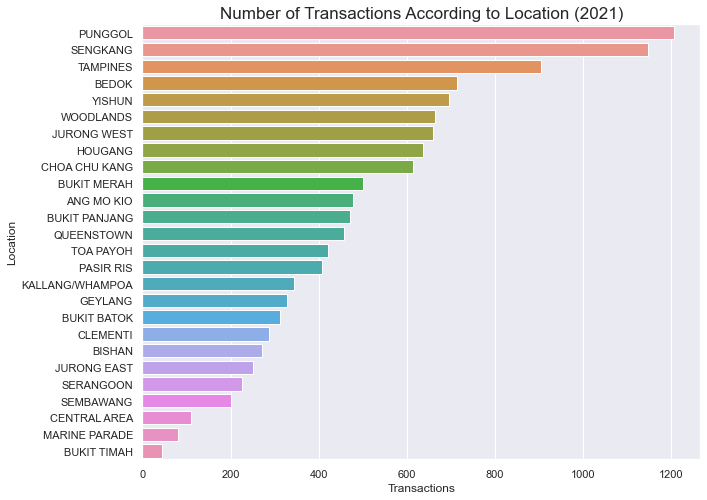

In [407]:
# compute the towns with the most transactions using barplot

sns.barplot(data=df6a, y='Location', x='Transactions');
plt.title('Number of Transactions According to Location (2021)', fontsize=17)

plt.show()

### Would you like to consider 4 rooms in the east part of island?

In [408]:
# compute resale prices for 4 rooms for 5 locations in the East

town = ['TAMPINES', 'BEDOK', 'MARINE PARADE', 'PASIR RIS','PUNGGOL']
east_4rm=[]
for i in town:
    x = df6.loc[(df6['town']==i) & (df6['flat_type']=='4 ROOM')] 
    east_4rm.append(x)
east_4rm = pd.concat(east_4rm)
east_4rm.head()

,year,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,month_dt,days_expired,remaining_lease,price_per_sqm
97516,2021,TAMPINES,4 ROOM,94.0,2011-01-01,680000.0,2021-02-01,3684 days,89.0,7234.0
97517,2021,TAMPINES,4 ROOM,94.0,2011-01-01,670000.0,2021-04-01,3743 days,89.0,7128.0
97518,2021,TAMPINES,4 ROOM,94.0,2011-01-01,660000.0,2021-04-01,3743 days,89.0,7021.0
97519,2021,TAMPINES,4 ROOM,94.0,2011-01-01,658000.0,2021-04-01,3743 days,89.0,7000.0
97520,2021,TAMPINES,4 ROOM,94.0,2011-01-01,669000.0,2021-05-01,3773 days,89.0,7117.0


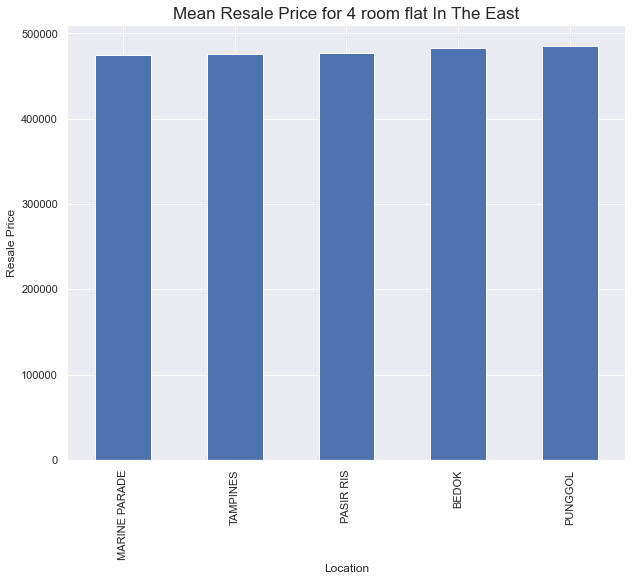

In [409]:
east_4rm.groupby('town')['resale_price'].mean().sort_values().plot.bar();
plt.xlabel('Location');
plt.ylabel('Resale Price');
plt.title('Mean Resale Price for 4 room flat In The East', fontsize=17);
plt.show()

### May be with close to a sum of 500k, I can get a 5 room flat somewhere up north?

In [410]:
# compute resale prices for 5 rooms for 5 locations in the North

town = ['WOODLANDS', 'YISHUN', 'SEMBAWANG']
north_5rm=[]
for i in town:
    x = df6.loc[(df6['town']==i) & (df6['flat_type']=='5 ROOM')] 
    north_5rm.append(x)
north_5rm = pd.concat(north_5rm)
north_5rm.head()

,year,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,month_dt,days_expired,remaining_lease,price_per_sqm
99040,2021,WOODLANDS,5 ROOM,117.0,1976-01-01,350000.0,2021-01-01,16437 days,54.0,2991.0
99041,2021,WOODLANDS,5 ROOM,126.0,1976-01-01,370000.0,2021-03-01,16496 days,54.0,2937.0
99042,2021,WOODLANDS,5 ROOM,115.0,1977-01-01,382000.0,2021-04-01,16161 days,55.0,3322.0
99043,2021,WOODLANDS,5 ROOM,124.0,1978-01-01,418000.0,2021-05-01,15826 days,56.0,3371.0
99044,2021,WOODLANDS,5 ROOM,124.0,1978-01-01,515000.0,2021-05-01,15826 days,56.0,4153.0


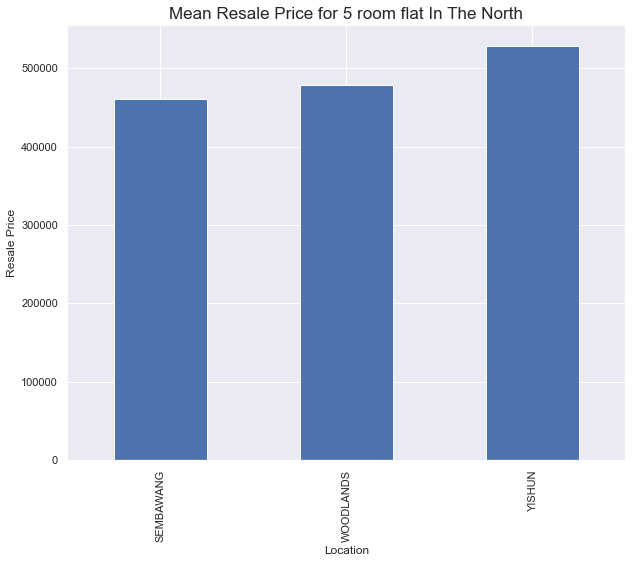

In [411]:
north_5rm.groupby('town')['resale_price'].mean().sort_values().plot.bar();
plt.xlabel('Location');
plt.ylabel('Resale Price');
plt.title('Mean Resale Price for 5 room flat In The North', fontsize=17);
plt.show()

In [412]:
north_5rm.head()

,year,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,month_dt,days_expired,remaining_lease,price_per_sqm
99040,2021,WOODLANDS,5 ROOM,117.0,1976-01-01,350000.0,2021-01-01,16437 days,54.0,2991.0
99041,2021,WOODLANDS,5 ROOM,126.0,1976-01-01,370000.0,2021-03-01,16496 days,54.0,2937.0
99042,2021,WOODLANDS,5 ROOM,115.0,1977-01-01,382000.0,2021-04-01,16161 days,55.0,3322.0
99043,2021,WOODLANDS,5 ROOM,124.0,1978-01-01,418000.0,2021-05-01,15826 days,56.0,3371.0
99044,2021,WOODLANDS,5 ROOM,124.0,1978-01-01,515000.0,2021-05-01,15826 days,56.0,4153.0


### May we have the price trend for 5 room flats in the north?

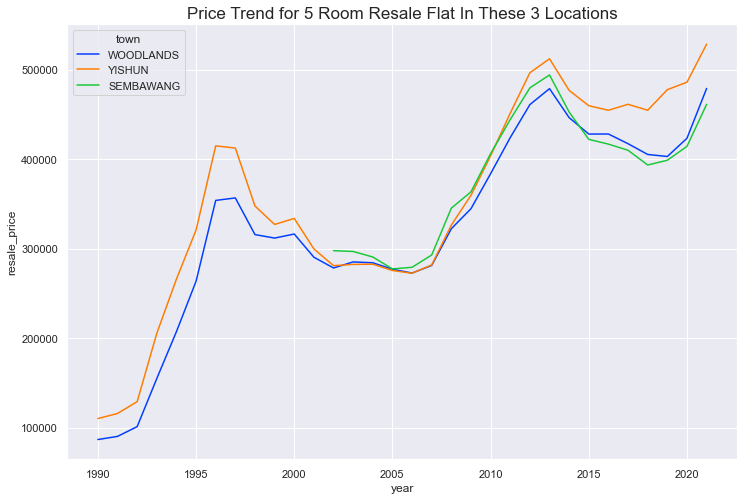

In [414]:
# price trend for north

town = ['WOODLANDS', 'YISHUN', 'SEMBAWANG']
north_5rm=[]
for i in town:
    x = df5.loc[(df5['town']==i) & (df5['flat_type']=='5 ROOM')] 
    north_5rm.append(x)
north_5rm = pd.concat(north_5rm)
north_5rm.head()

fig=plt.gcf()
fig.set_size_inches(12,8)
sns.lineplot(data=north_5rm, x='year', y='resale_price', hue='town', palette='bright', ci=None);
plt.title('Price Trend for 5 Room Resale Flat In These 3 Locations', fontsize=17);

### Let's narrow down our choice to Yishun, remaining lease of at lease 70years, price of < 500k, and must be 5 room and floor area must be greater than 110sqm.  Find the location.

In [439]:
# list down all the requirements of the client and assign to 'requirement'

requirement =(df6['town']=='YISHUN') & (df6['remaining_lease']>70) & (df6['resale_price']<500000) &\
               (df6['flat_type']=='5 ROOM') & (df6['floor_area_sqm']>110)

choice=df6.loc[requirement]

In [440]:
choice

,year,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,month_dt,days_expired,remaining_lease,price_per_sqm
99845,2021,YISHUN,5 ROOM,133.0,1993-01-01,478000.0,2021-01-01,10227 days,71.0,3594.0
99888,2021,YISHUN,5 ROOM,135.0,1993-01-01,452000.0,2021-01-01,10227 days,71.0,3348.0
99895,2021,YISHUN,5 ROOM,123.0,1993-01-01,457000.0,2021-02-01,10258 days,71.0,3715.0
99917,2021,YISHUN,5 ROOM,111.0,2000-01-01,490000.0,2021-01-01,7671 days,78.0,4414.0
99937,2021,YISHUN,5 ROOM,112.0,2016-01-01,495000.0,2021-01-01,1827 days,94.0,4420.0


In [417]:
myindex=choice.index.tolist()

In [418]:
myindex

[99845, 99888, 99895, 99917, 99937]

In [419]:
df4=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df4.loc[df4.index.isin(myindex)]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
99845,2021-01,YISHUN,5 ROOM,419,YISHUN AVE 11,01 TO 03,133.0,Model A,1993,70 years 11 months,478000.0
99888,2021-01,YISHUN,5 ROOM,413,YISHUN RING RD,01 TO 03,135.0,Model A,1993,71 years 02 months,452000.0
99895,2021-02,YISHUN,5 ROOM,413,YISHUN RING RD,01 TO 03,123.0,Improved,1993,71 years,457000.0
99917,2021-01,YISHUN,5 ROOM,299,YISHUN ST 20,10 TO 12,111.0,Improved,2000,78 years 11 months,490000.0
99937,2021-01,YISHUN,5 ROOM,504C,YISHUN ST 51,01 TO 03,112.0,Improved,2016,94 years 02 months,495000.0


### May I know the trend of  HDB this year?  Will the price drop? Should I wait?

In [473]:
from sklearn.preprocessing import StandardScaler


In [474]:
#find average HDB price by year and standardize the data

df_mean= df5.groupby('year')['price_per_sqm'].agg(np.mean).to_frame().reset_index()
scaler = StandardScaler()
x=df_mean['price_per_sqm'].values.reshape(-1,1)
df_mean['price_per_sqm_sc']=scaler.fit_transform(x)


In [475]:
#find the total amount of resale by year and standardize the data

df5_1=df5.groupby('year')['resale_price'].agg(np.sum).reset_index()
scaler = StandardScaler()
x=df5_1['resale_price'].values.reshape(-1,1)
df5_1['resale_price_sc']=scaler.fit_transform(x)


In [476]:
# plot a regression line for price per sqm
from scipy import stats

x=np.array(df_mean['year'])
y=np.array(df_mean['price_per_sqm_sc'])

slope, intercept, r, p, stderr = stats.linregress(x,y)

func = lambda x: slope*x + intercept

x1=np.array([1990,2021])
y1=np.array([func(1990), func(2021)])

In [477]:
# plot a regression line for total resale volume
from scipy import stats

x2=np.array(df5_1['year'])
y2=np.array(df5_1['resale_price_sc'])

slope, intercept, r, p, stderr = stats.linregress(x2,y2)

func = lambda x: slope*x + intercept

x3=np.array([1990,2021])
y3=np.array([func(1990), func(2021)])

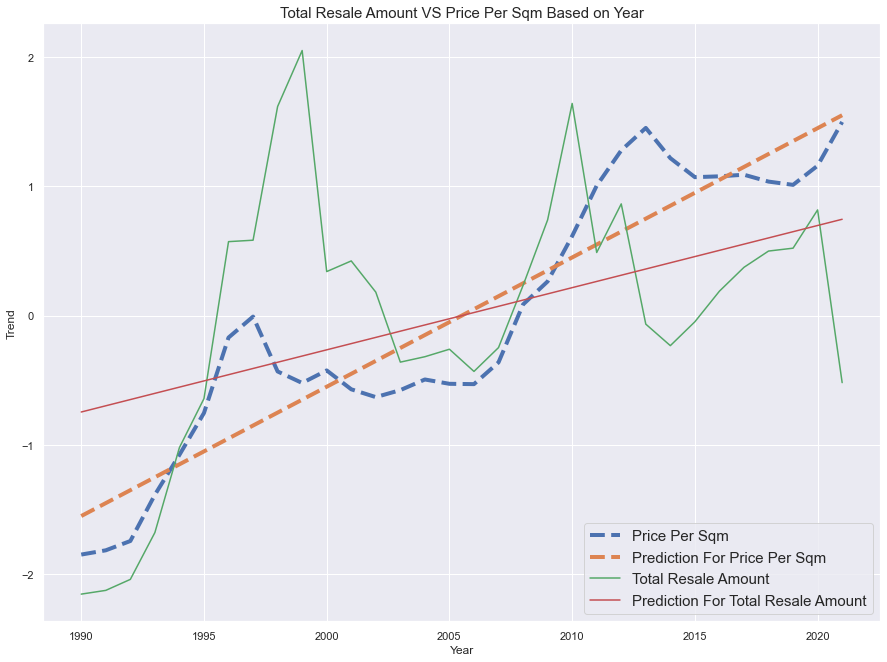

In [504]:
#plot price per sqm and total resale amount and regression line for price per sqm

plt.plot(df_mean['year'],df_mean['price_per_sqm_sc'], linestyle='--',linewidth=4);
plt.plot(x1,y1, linestyle='--',linewidth=4)
plt.plot(df5_1['year'], df5_1['resale_price_sc']);

plt.plot(x3,y3)

fig=plt.gcf();
fig.set_size_inches(15,11);
plt.xlabel('Year');
plt.ylabel('Trend');
plt.title('Total Resale Amount VS Price Per Sqm Based on Year', fontsize=15);
plt.legend(['Price Per Sqm','Prediction For Price Per Sqm','Total Resale Amount','Prediction For Total Resale Amount'],\
           fontsize=15, loc='lower right');

### Can we compare the trend of private properties vs HDB in resale prices?

In [491]:
dfp = pd.read_csv('private-residential-property-price-index-base-quarter-2009-q1-100.csv')


In [492]:
# format year column

dfp['year']=[i[:-3] for i in dfp['quarter']]

In [493]:
# re-ordering column names

dfp[['year','quarter','level_1','value']]

,year,quarter,level_1,value
0,1975,1975-Q1,Residential Properties,8.9
1,1975,1975-Q2,Residential Properties,9.1
2,1975,1975-Q3,Residential Properties,9.1
3,1975,1975-Q4,Residential Properties,9.1
4,1976,1976-Q1,Residential Properties,9.5
...,...,...,...,...
176,2019,2019-Q1,Residential Properties,148.6
177,2019,2019-Q2,Residential Properties,150.8
178,2019,2019-Q3,Residential Properties,152.8
179,2019,2019-Q4,Residential Properties,153.6


In [494]:
# compute average price by year

dfp_yr=dfp.groupby('year')['value'].agg(np.mean).to_frame()
dfp_yr.reset_index(inplace=True)

In [495]:
# format year to integter

dfp_yr['year']=[int(j) for j in dfp_yr['year']]

In [496]:
# create dataframe for transactions after 1989

dfp_yr=dfp_yr[dfp_yr['year']>1989]

dfp_yr.head()

,year,value
15,1990,41.250
16,1991,45.525
17,1992,52.700
18,1993,67.350
19,1994,96.775


In [497]:
# standardize the chart

stdz = StandardScaler()
x=dfp_yr.value.values.reshape(-1,1)
dfp_yr['value1']=stdz.fit_transform(x)

In [498]:
# remove year 2021 from dataframe

df_mean_1=df_mean[df_mean['year']<2021]

In [499]:
x5=np.array(df_mean_1['year'])
y5=np.array(df_mean_1['price_per_sqm_sc'])

slope, intercept, r, p, stderr = stats.linregress(x5,y5)
func = lambda x: slope*x + intercept

x6=np.array([1990,2020])
y6=np.array([func(1990), func(2020)])

In [500]:
x7=np.array(dfp_yr['year'])
y7=np.array(dfp_yr['value1'])

slope1, intercept1, r, p, stderr = stats.linregress(x7,y7)
func1 = lambda x: slope1*x + intercept1

x8=np.array([1990,2020])
y8=np.array([func1(1990), func1(2020)])

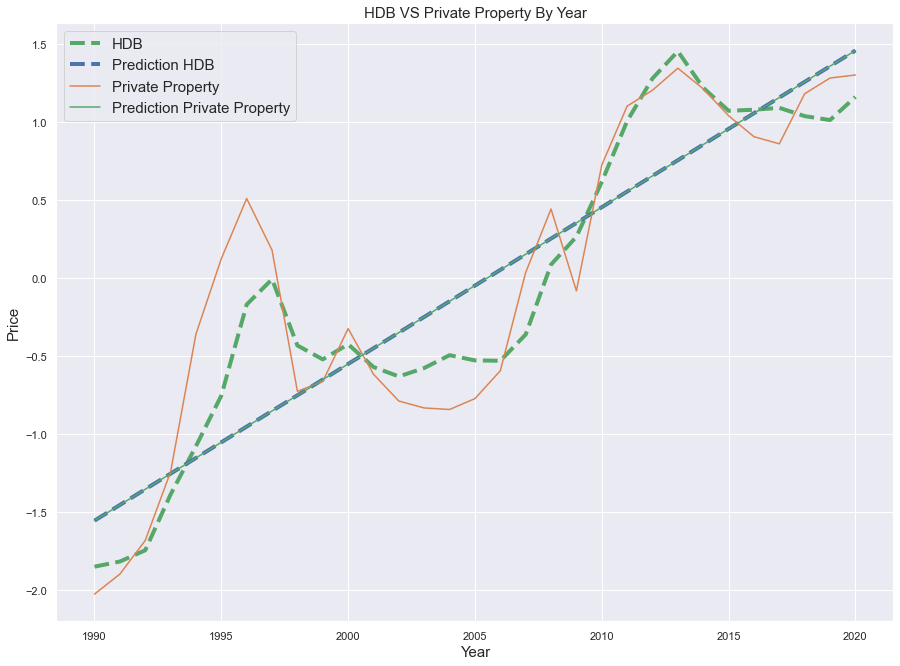

In [503]:
# create dataframe for HDB for year before 2021 to align with private property price index

fig=plt.gcf()
fig.set_size_inches(15,11)

plt.plot(df_mean_1['year'],df_mean_1['price_per_sqm_sc'],c = 'g', linestyle='--',linewidth=4);
plt.plot(x6,y6,linestyle ='--',linewidth=4 );
plt.plot(dfp_yr['year'],dfp_yr['value1']);
plt.plot(x4,y4,);

plt.xlabel('Year',fontsize=15);
plt.ylabel('Price',fontsize=15);
plt.title('HDB VS Private Property By Year',fontsize=15);
plt.legend(['HDB','Prediction HDB','Private Property','Prediction Private Property'], fontsize=15);

# Thank You!